### Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

- Una variable categòrica (Districte o Barri)
- Una variable numèrica (Preu)
- Una variable numèrica i una categòrica (Districte i Preu)
- Dues variables numèriques (Any o Trimestre i Preu)
- Tres variables (Barri o Districte, Trimestre i Preu)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

df = pd.read_csv('preu _lloguer_per_trimestre_i_barri.csv')

##### Resum estadístic

In [2]:
summary = df.describe()
print(summary)

          Any   Trimestre  Codi_Districte  Codi_Barri
count   584.0  584.000000      584.000000  584.000000
mean   2021.0    2.500000        6.246575   37.000000
std       0.0    1.118992        2.790726   21.089371
min    2021.0    1.000000        1.000000    1.000000
25%    2021.0    1.750000        4.000000   19.000000
50%    2021.0    2.500000        7.000000   37.000000
75%    2021.0    3.250000        8.000000   55.000000
max    2021.0    4.000000       10.000000   73.000000


In [3]:
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


##### Una variable categòrica

La següent visualització permet veure la quantitat de lloguers que hi ha a cada districte. Essent Nou Barris el districte amb major nombre de llogers, seguit per Horta-Guinardó més de 100 i 80 respectiament; en contraposició, Ciutat Vella i Les Corts amb el menor nombre de lloguers, menys de 40 i una mica més de 20, respectivament.

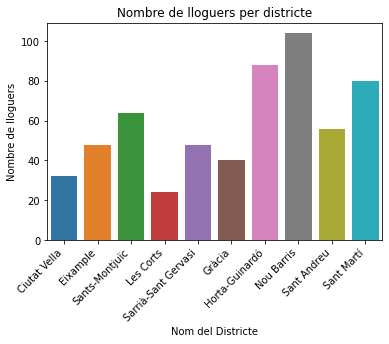

<Figure size 432x288 with 0 Axes>

In [4]:
sns.countplot(x='Nom_Districte', data=df)
plt.xlabel('Nom del Districte')
plt.ylabel('Nombre de lloguers')
plt.xticks(rotation=45, ha='right')
plt.title('Nombre de lloguers per districte')
fig=plt.show()

plt.savefig('TascaM4T01_Exercici2_1.png')

##### Una variable numèrica 

El gràfic ens mostra la distribució dels preus en funció del nombre de lloguers. Podem observar dos focus, un proper als 100€ i el segon amb màxim als 800€. Així doncs, aquests seran els preus predominants a la ciutat de Barcelona. A més a més observem que els preus varien entre els 100€ i els 1800€ mensuals.

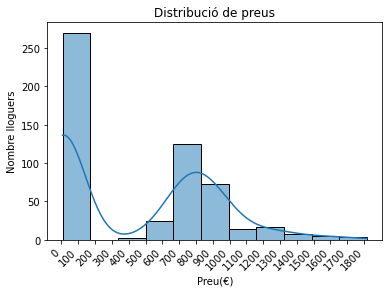

<Figure size 432x288 with 0 Axes>

In [5]:
df = df.replace("--", np.nan)

# Elimino files amb NaN
df = df.dropna(subset=["Preu"])

df["Preu"] = pd.to_numeric(df["Preu"])
sns.histplot(data=df, x="Preu", kde=True)
plt.xticks(range(0, int(df["Preu"].max()), 100),rotation=45, ha='right')
plt.xlabel('Preu(€)')
plt.ylabel('Nombre lloguers')
plt.title("Distribució de preus")
plt.show()

plt.savefig('TascaM4T01_Exercici2_2.png')

##### Una variable numèrica i una categòrica

A continuació una visualització del nombre de lloguers agrupats en quatre blocs de preu y districte, on es pot observar que tots els bdistrictes tenen lloguers per menys de 1000 €. Aquests predominen als districtes d'Horta-Guinardó, Nou Barris i Sant Martí, mentre Sant Gervasi i Les Corts són els que en tenen el nombre inferior. Dins el tercer grup, entre 1000 y 1999 € se situen la gairebé la majoria de lloguers de Sant Gervasi, també se'n poden trobar en menor nombre a l'Eixample, Sant Martí i Les Corts, mentre que la resta de districtes els lloguers no sobrepassen els 1000€. Com a detall es pot observar que al districte de Sant Gervasi els preus estan polaritzats i a la franja entre 500 i 999 € hi ha molt pocs lloguers.

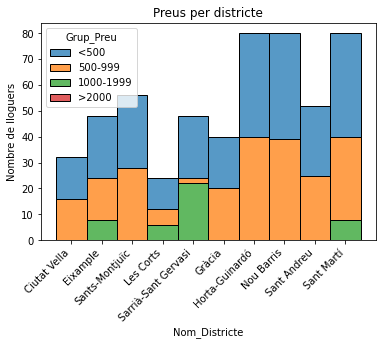

<Figure size 432x288 with 0 Axes>

In [6]:
 #Dividim els preus dels lloguers en grups.
df['Grup_Preu'] = pd.cut(df['Preu'], bins=[0, 500, 1000, 2000, np.inf], labels=['<500', '500-999', '1000-1999', '>2000'])

sns.histplot(data=df, x="Nom_Districte", hue="Grup_Preu", multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Nombre de lloguers')
plt.title('Preus per districte')
plt.show()

plt.savefig('TascaM4T01_Exercici2_3.png')

##### Dues variables numèriques

El gràfic de 'Preu per trimestre' mostra el rang de preus dels lloguers de Barcelona durant els quatre trimestres de l'any 2021. Es pot observar que els preus estaven continguts per sota els 1750€ durant el primer trimestre i a mesura que ha avaçat l'any els preus han anat pujant fins superar aquest llindar. Finalment, durant el quart trimestre han tornat a baixar per sota els 1750€. També s'hi pot veure com la majoria de lloguers es troben entre els 500 i poc més de 1000€ menusuals.

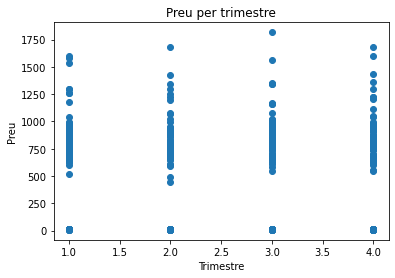

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(x=df['Trimestre'], y=df['Preu'])
plt.xlabel('Trimestre')
plt.ylabel('Preu')
plt.title('Preu per trimestre')
plt.show()

plt.savefig('TascaM4T01_Exercici2_4.png')

##### Tres variables

En aquesta darrera visualització es poden veure els preus mitjans de lloger per districte i trimestre de l'any 2021. S'observa que els districtes amb els preus més elevats són Sarrià-Sant Gervasi seguit de Les Corts, tots dos amb lloguers entre els 600 i els 650 € mensuals, en referència a l'evolució amb els trimestres els preu baixen el segon i el tercer trimeste i el quart tornen a pujar, mentre a Les Corts puja el primer i el segon trimestre i torna a baixar l'últim trimestre de l'any. Pel que fa als districtes amb els llogers més baixos hi ha Sant Andreu, al voltant dels 400 € i Nou Barris 350 €, en ambdós casos els preus es mantenen força constants amb una baixada al segon trimestre que es recupera durant el tercer i es manté el quart. Respecte la resta de barris, en general, la tendencia és a pujar el preu.

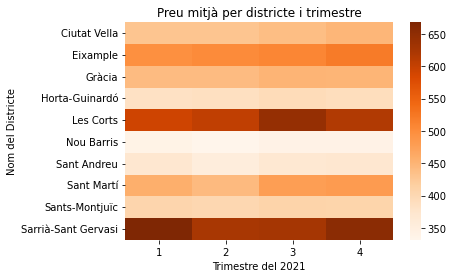

<Figure size 432x288 with 0 Axes>

In [8]:
# Nova taula amb els preus mitjans per districte y trimestre
precios_pivote = pd.pivot_table(df, values='Preu', index='Nom_Districte', columns='Trimestre', aggfunc='mean')

sns.heatmap(precios_pivote, cmap='Oranges')
plt.title('Preu mitjà per districte i trimestre')
plt.xlabel('Trimestre del 2021')
plt.ylabel('Nom del Districte')
plt.show()

plt.savefig('TascaM4T01_Exercici2_5.png')

### Exercici 2
Exporta els gràfics com imatges o com HTML.

![Gràfics_exportats]('Exercici2.png')

### Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant. 

La visualització que es mostra a seguidament mostra l'evolució dels preus dels lloguers per barris, agrupats per districtes durant l'any 2021. Es pot observar com la majoria de barris mantenen el preu constant durant tot l'any o amb petites variacions.

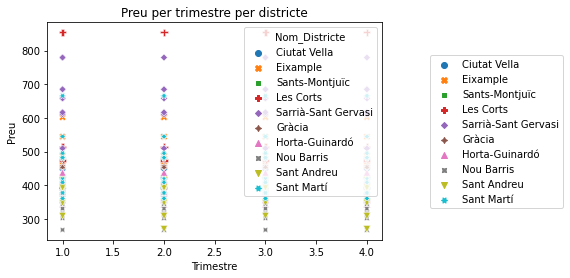

In [9]:
df['Preu_barri'] = df.groupby('Nom_Barri')['Preu'].transform('mean')

sns.scatterplot(data=df, x="Trimestre", y="Preu_barri", hue="Nom_Districte", style="Nom_Districte", s=50)
fig = plt.gcf()
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('Trimestre')
plt.ylabel('Preu')
plt.title('Preu per trimestre per districte')

plt.show()
